In [66]:
import random
import matplotlib.pyplot as plt

# Problème du sac à dos

In [67]:
x = []
v = []
w = []
with open("data/ks_19_0", "r") as f:
    i = 0;
    for line in f:
        line_list = line.strip().split(" ")
        if(i == 0):
            n = int(line_list[0])
            k = int(line_list[1])
        else :
            x.append(0)
            v.append(int(line_list[0]))
            w.append(int(line_list[1]))
        i += 1

In [68]:
def reset_x(x, n):
    for i in range(n):
        x[i] = 0
    return(x)

In [69]:
def total_value(x, v):
    res = 0
    for i in range(n):
        res += x[i] * v[i]
    return(res)

In [70]:
def total_weight(x, w):
    res = 0
    for i in range(n):
        res += x[i] * w[i]
    return(res)

## Méthode aléatoire

In [71]:
def alea_method(x, v, w, n, k):

    for i in range(n):
        x[i] = random.randint(0,1)

    while(total_weight(x, w) > k):
        wasRemoved = False
        while(not wasRemoved):
            indice = random.randint(0, n-1)
            if x[indice] == 1 :
                x[indice] = 0
                wasRemoved = True
    
    return(x)


In [72]:
max_value = 0
for _ in range(100):
    value = total_value(alea_method(x, v, w, n, k), v)
    if value > max_value :
        max_value = value

print(max_value)

12098


## Trier les objects par valeur

In [73]:
def sort_values_method(x, v, w, n, k):

    sorted_v = sorted(v)

    for i in range(n):

        best_value = sorted_v[i]
        for idx, value in enumerate(v) :
            if value == best_value:
                best_indice = idx
            
        x_tmp = x.copy()
        x_tmp[best_indice] = 1

        
        if total_weight(x_tmp, w) <= k:
            x[best_indice] = 1
    
    return(x)

In [74]:
x = reset_x(x, n)
value = total_value(sort_values_method(x, v, w, n, k), v)
value

11080

## Trier les objets par poids

In [75]:
def sort_weights_method(x, v, w, n, k):

    sorted_w = sorted(w)

    for i in range(n):

        best_weight = sorted_w[i]
        for idx, weight in enumerate(w) :
            if weight == best_weight:
                best_indice = idx
            
        x_tmp = x.copy()
        x_tmp[best_indice] = 1

        
        if total_weight(x_tmp, w) <= k:
            x[best_indice] = 1
    
    return(x)

In [76]:
x = reset_x(x, n)
value = total_value(sort_weights_method(x, v, w, n, k), v)
value

11080

## Trier les objets par densité

In [77]:
def sort_density_method(x, v, w, n, k):

    d = []
    for i in range(n):
        d.append(v[i] / w[i])

    sorted_d = sorted(d)

    for i in range(n):

        best_density = sorted_d[i]
        for idx, density in enumerate(d) :
            if density == best_density:
                best_indice = idx
            
        x_tmp = x.copy()
        x_tmp[best_indice] = 1

        
        if total_weight(x_tmp, w) <= k:
            x[best_indice] = 1
    
    return(x)

In [78]:
x = reset_x(x, n)
value = total_value(sort_density_method(x, v, w, n, k), v)
value

11080

## Algorithme de LAHC

In [79]:
def new_neighbor(x, w, k):

    hasChanged = False

    while not hasChanged:

        x_tmp = x.copy()
        indice = random.randint(0, n-1)

        if x_tmp[indice] == 0:
            x_tmp[indice] = 1
        else:
            x_tmp[indice] = 0
        
        if total_weight(x_tmp, w) < k:
            x = x_tmp.copy()
            hasChanged = True

    return(x)

In [80]:
def lahc(x, v, w, n, k, n_mem):

    x_max = x.copy()

    value_max = total_value(x_max, v)

    memory = []
    for i in range(n_mem):
        memory.append(value_max)

    convergence_value_max = []

    cpt = 1

    while cpt < 2000:

        value_mem = memory[cpt % n_mem]
        neighbor = new_neighbor(x, w, k)
        value_neighbor = total_value(neighbor, v)

        if value_neighbor > value_mem :
            x = neighbor.copy()

        memory[cpt % n_mem] = value_neighbor

        if value_neighbor > value_max:
            x_max = neighbor.copy()
            value_max = value_neighbor

        convergence_value_max.append(value_max)

        cpt += 1

    return(x_max, value_max, convergence_value_max)



12185


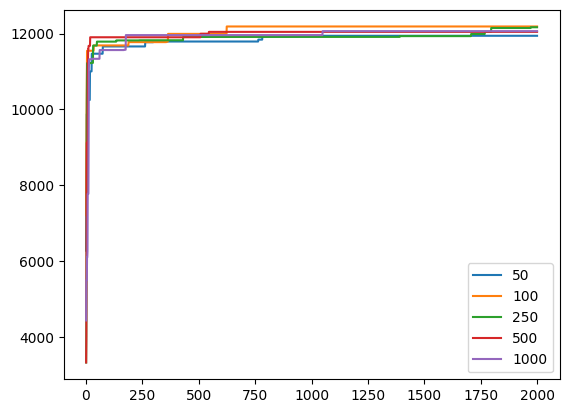

In [85]:
x = reset_x(x, n)
x = alea_method(x, v, w, n, k)

x_max1, value_max1, convergence_value_max1 = lahc(x, v, w, n, k, 50)

x_max2, value_max2, convergence_value_max2 = lahc(x, v, w, n, k, 100)

x_max3, value_max3, convergence_value_max3 = lahc(x, v, w, n, k, 250)

x_max4, value_max4, convergence_value_max4 = lahc(x, v, w, n, k, 500)

x_max5, value_max5, convergence_value_max5 = lahc(x, v, w, n, k, 1000)

plt.plot(range(1, 2000), convergence_value_max1, label='50')
plt.plot(range(1, 2000), convergence_value_max2, label='100')
plt.plot(range(1, 2000), convergence_value_max3, label='250')
plt.plot(range(1, 2000), convergence_value_max4, label='500')
plt.plot(range(1, 2000), convergence_value_max5, label='1000')

print(max(value_max1, value_max2, value_max3, value_max4, value_max5))

plt.legend()

plt.show()